# **Project to find the correlation between latitudes and the spread of CoVID-19**

**Objectives/ guidelines to keep in mind:**

*   Segregate all data region-wise
*   Replace the regions column with the corresponding latitudes from the latitudes dataset
*   Visually determine the rates of growth in cases in the most-hit and the least-hit regions
*   Predict the growth of cases and check if latitudes and growth are correlated; whether latitudes behave as a deciding factor in prediction

**IMPORTANT: Remember to add the CSV files everytime you log in to the notebook. The CSV files are kept in the GitHub repository; you can save them to your respective devices and upload them whenever you work.**

**Directions for saving:**

- Go to File - Save a copy on GitHub.
- Select the repository and the branch "ipython".
- **Do not change the name of the Colab notebook while saving.**

Also, try to create a text cell to note the variable names with their specifications wherever possible. It'll be helpful for all teammates.





In [0]:
import pandas as pd

#latitudes = pd.read_csv('latitudes.csv')
#covid_data = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

url = 'https://raw.githubusercontent.com/welivefree/GetBoarded_Latitude/ipython/covid_19_data.csv'
covid_data = pd.read_csv(url)

url1='https://raw.githubusercontent.com/welivefree/GetBoarded_Latitude/ipython/world_country_and_usa_states_latitude_and_longitude_values.csv'
latitudes = pd.read_csv(url1)

In [0]:
latitudes_countries = latitudes.iloc[:, :4]
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
latitudes.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [0]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**Finding all countries listed in the Country/ Region column of CoVID Dataset:**

In [0]:
covid_data['Country/Region'].nunique()   #Returns number of unique labels contained in the column

219

In [0]:
covid_data['Country/Region'].unique()   #Returns all unique labels contained in the column


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

**Seeing anomalies like "british india ocean territory" is not a country**

**Similarly, finding all countries listed under the 'Country' column of the latitudes dataset**

In [0]:
latitudes_countries['country'].unique()
latitudes_countries['country'].nunique()

245

# **We Observe:**
- China is called "Mainland China" in the CoVID-19 Dataset
- The number of countries in the latitude dataset is more; the countries present in both datasets need to be replaced with their corresponding latitudes

Hence, we need to:
- Check for extra countries in either dataset
- Merge those countries with bigger countries manually (ex: if one dataset calls it US while the other calls it United States, both need to be merged into one label and so on)
- Discard redundant countries/ countries with zero cases

In [0]:
latitudes_countries['country'].unique()

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia',
       'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Cocos [Keeling] Islands', 'Congo [DRC]',
       'Central African Republic', 'Congo [Republic]', 'Switzerland',
       "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethi

In [0]:
covid_data['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [0]:
#Define a function to seperate extra countries in both datasets
import numpy as np

def extra_countries(c1, c2):
  extra_countries = []
  for i in c1:
    flag = 0
    for j in c2:
      if (i == j):
        flag = 1
    if (flag == 0):
      extra_countries.append(i)
  
  return np.array(extra_countries)

In [0]:
#Finding countries that are in latitudes.csv but not in covid_19_data.csv

extra_countries(latitudes_countries['country'].unique(), covid_data['Country/Region'].unique())

array(['Anguilla', 'Netherlands Antilles', 'Antarctica', 'American Samoa',
       'Bermuda', 'Bouvet Island', 'Cocos [Keeling] Islands',
       'Congo [DRC]', 'Congo [Republic]', "Côte d'Ivoire", 'Cook Islands',
       'China', 'Christmas Island', 'Falkland Islands [Islas Malvinas]',
       'Micronesia', 'United Kingdom',
       'South Georgia and the South Sandwich Islands', 'Gaza Strip',
       'Heard Island and McDonald Islands', 'Isle of Man',
       'British Indian Ocean Territory', 'Kiribati', 'Comoros',
       'North Korea', 'Lesotho', 'Marshall Islands', 'Macedonia [FYROM]',
       'Myanmar [Burma]', 'Northern Mariana Islands', 'Montserrat',
       'New Caledonia', 'Norfolk Island', 'Nauru', 'Niue',
       'French Polynesia', 'Saint Pierre and Miquelon',
       'Pitcairn Islands', 'Palestinian Territories', 'Palau', 'Réunion',
       'Solomon Islands', 'Saint Helena', 'Svalbard and Jan Mayen',
       'São Tomé and Príncipe', 'Swaziland', 'Turks and Caicos Islands',
       'Fren

In [0]:
#Finding countries that are in covid_19_data.csv but not in latitudes.csv

extra_countries(covid_data['Country/Region'].unique(),latitudes_countries['country'].unique())

array(['Mainland China', 'US', 'Ivory Coast', 'UK', 'Others',
       'North Macedonia', ' Azerbaijan', 'North Ireland',
       'Saint Barthelemy', 'Palestine', 'Republic of Ireland',
       'St. Martin', 'occupied Palestinian territory', "('St. Martin',)",
       'Channel Islands', 'Holy See', 'Congo (Kinshasa)', 'Reunion',
       'Curacao', 'Eswatini', 'Congo (Brazzaville)',
       'Republic of the Congo', 'The Bahamas', 'The Gambia',
       'Gambia, The', 'Bahamas, The', 'Cabo Verde', 'East Timor',
       'Diamond Princess', 'West Bank and Gaza', 'Burma', 'MS Zaandam',
       'South Sudan', 'Sao Tome and Principe'], dtype='<U30')

**Replace country names in CoVID-19 dataset with matching names from Latitudes dataset**

In [0]:
corrected_covid_data = covid_data.replace(['Mainland China', 'US', 'Ivory Coast', 'UK',
       'North Macedonia', ' Azerbaijan', 'North Ireland',
       'Republic of Ireland',
       'Congo (Kinshasa)',
       'Congo (Brazzaville)',
       'Republic of the Congo', 'The Bahamas', 'The Gambia',
       'Gambia, The', 'Bahamas, The',
       'Diamond Princess', 'West Bank and Gaza', 'Burma',
       'South Sudan'], ['China', 'United States', "Côte d'Ivoire", 'United Kingdom',
                                                 'Macedonia [FYROM]', 'Azerbaijan', 'Ireland', 'Ireland', 'Congo [DRC]',
                                                 'Congo [DRC]', 'Congo [DRC]', 'Bahamas', 'Gambia', 'Gambia', 'Bahamas',
                                                 'Japan', 'Gaza Strip', 'Myanmar [Burma]', 'Sudan'])
countries_to_drop = ['Others','Palestine', 'Saint Barthelemy', 'St. Martin', 'occupied Palestinian territory', "(St. Martin',)",
                     'Channel Islands', 'Holy See', 'Reunion', 'Curacao', 'Eswatini', 'Cabo Verde', 'East Timor', 'MS Zaandam',
                     'Sao Tome and Principe']

In [0]:
corrected_covid_data.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
5,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colorado


In [0]:
#Finding countries in corrected_covid_data but not in latitudes

extras = extra_countries(corrected_covid_data['country'].unique(), latitudes_countries['country'].unique())

In [0]:
for i in extras:
  corrected_covid_data = corrected_covid_data[corrected_covid_data['country'] != i]

## **Enter code to replace the Country/ Region column with the latitude and longitude columns**
Also, drop unnecessary columns

In [0]:
corrected_covid_data.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
5,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colorado


In [0]:
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
req_lat_long = corrected_covid_data.loc[:,['country','latitude', 'longitude']]
req_lat_long = req_lat_long.set_index('country')

In [0]:
corrected_covid_data.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
5,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colorado


In [0]:
req_lat_long.head()

,latitude,longitude
country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Albania,41.153332,20.168331


In [0]:
latitude_cols = []
longitude_cols = []

for i in corrected_covid_data['country']:
  latitude = req_lat_long.loc[i, 'latitude']
  longitude = req_lat_long.loc[i, 'longitude']
  latitude_cols.append(latitude)
  longitude_cols.append(longitude)

latitude_cols = np.array(latitude_cols)
longitude_cols = np.array(longitude_cols)

In [0]:
corrected_covid_data['Latitude'] = latitude_cols
corrected_covid_data['Longitude'] = longitude_cols

In [0]:
corrected_covid_data.head()       #Obtained latitude and longitude for all countries within the dataframe

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,Latitude,Longitude
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska,42.546245,1.601554
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama,23.424076,53.847818
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas,33.939110,67.709953
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona,17.060816,-61.796428
5,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colorado,41.153332,20.168331


In [0]:
corrected_covid_data.to_csv('cleaned_data.csv')

In [0]:
df=corrected_covid_data

**Seeing the types of classes and data in covid_data**

In [0]:
covid_data.describe()

,SNo,Confirmed,Deaths,Recovered
count,13209.000000,13209.000000,13209.000000,13209.000000
mean,6605.000000,1544.306685,73.532213,388.369672
std,3813.254188,8848.860227,669.862675,3469.003399
min,1.000000,0.000000,0.000000,0.000000
25%,3303.000000,5.000000,0.000000,0.000000
50%,6605.000000,51.000000,0.000000,1.000000
75%,9907.000000,345.000000,3.000000,24.000000
max,13209.000000,151061.000000,17669.000000,64142.000000


In [0]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              13209 non-null  int64  
 1   ObservationDate  13209 non-null  object 
 2   Province/State   6827 non-null   object 
 3   Country/Region   13209 non-null  object 
 4   Last Update      13209 non-null  object 
 5   Confirmed        13209 non-null  float64
 6   Deaths           13209 non-null  float64
 7   Recovered        13209 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 825.7+ KB


**Seeing the number of cases country wise**

In [0]:
covid_data["Country/Region"].value_counts()

US                     2614
Mainland China         2416
Canada                  503
Australia               460
France                  301
                       ... 
Republic of Ireland       1
East Timor                1
('St. Martin',)           1
Channel Islands           1
 Azerbaijan               1
Name: Country/Region, Length: 219, dtype: int64

**Visualisation**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

**Number of Deaths per country (Click on the image to enlarge)**

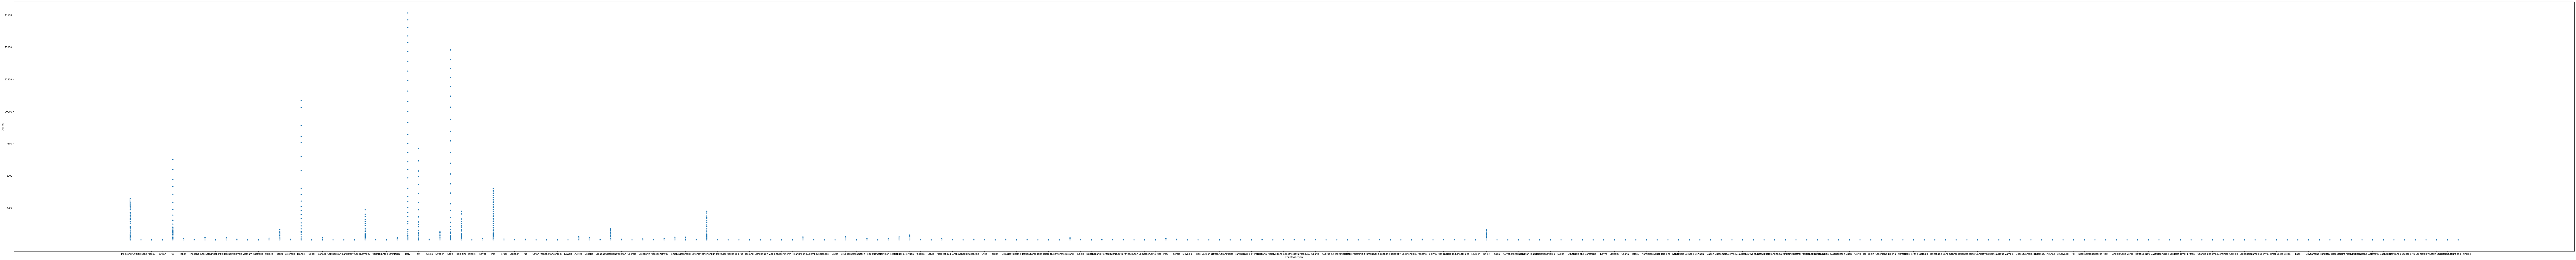

In [0]:

plt.figure(figsize=(200,20))
sns.scatterplot(x='Country/Region',y='Deaths',data=covid_data)


**Number of Deaths vs Number of confirmed cases**

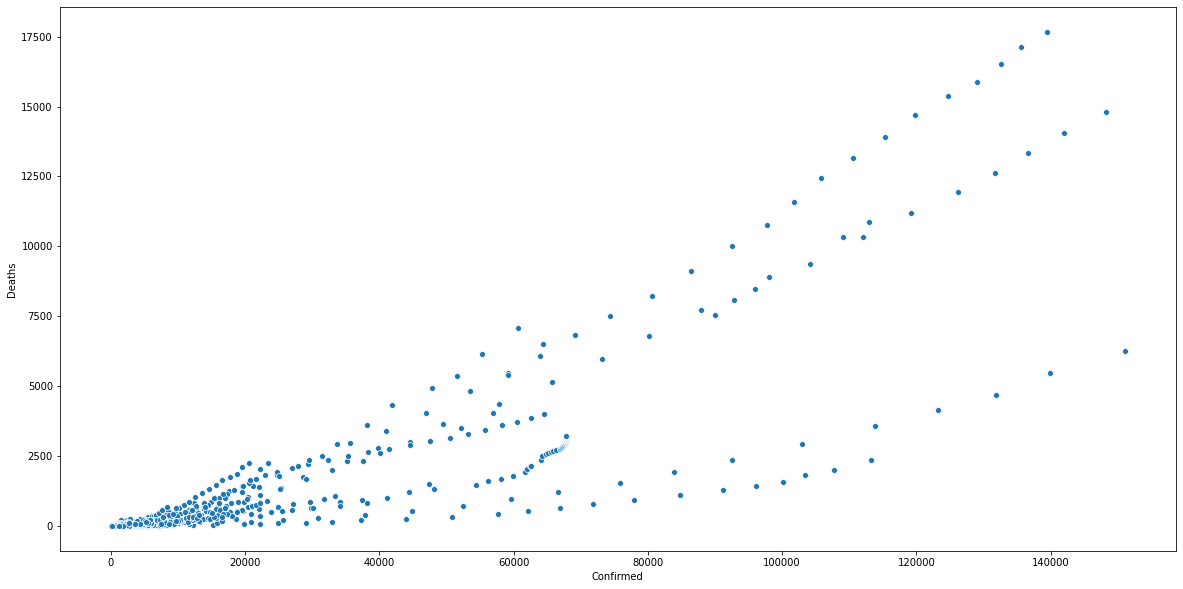

In [0]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Confirmed',y='Deaths',data=covid_data)

**PLotting country wise Deaths on Confirmed cases**

[Text(0, 0.5, ''), (0.0, 24.0), Text(0.5, 0, 'Deaths per Confirmed cases')]

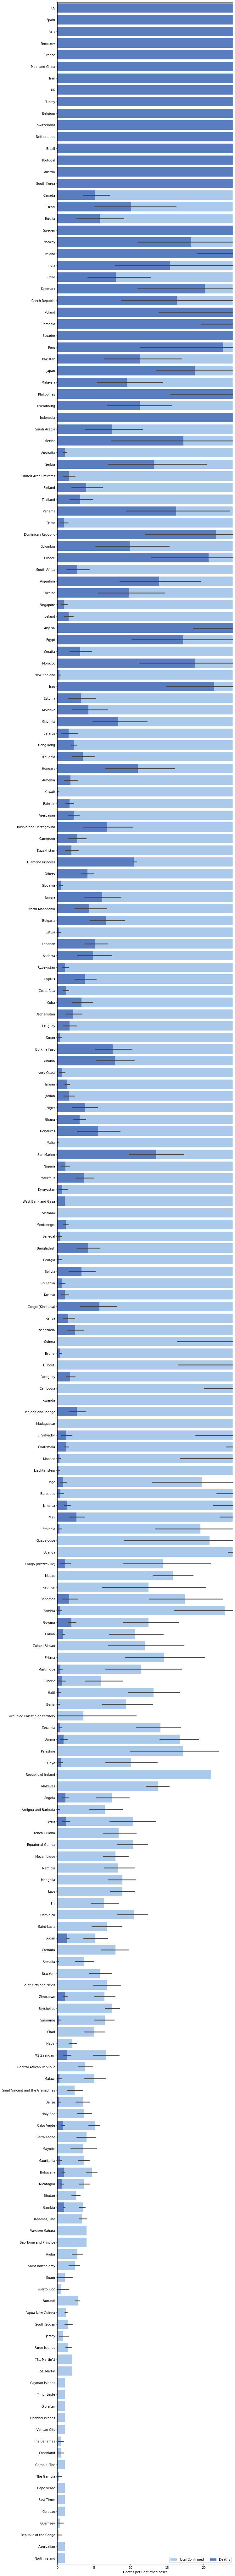

In [0]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 150))

covid_data1 = covid_data.sort_values("Confirmed", ascending=False)


sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country/Region", data=covid_data1,
            label="Total Confirmed", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="Country/Region", data=covid_data1,
            label="Deaths", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Deaths per Confirmed cases")
sns.despine(left=True, bottom=True)